# Business Understanding

## Latar belakang
TokoGenZ adalah marketplace baru yang menawarkan berbagai produk dari berbagai penjual. Dengan pertumbuhan jumlah produk yang terdaftar, TokoGenZ menghadapi masalah signifikan dalam hal pengalaman pengguna. Pengguna mengalami kesulitan dalam menemukan barang yang mereka cari karena kurangnya sistem pengelompokan yang jelas. Data yang tersedia saat ini hanya mencakup informasi dasar seperti judul produk, jumlah terjual, lokasi penjual, harga, dan rating, tanpa adanya struktur kategori yang memadai. Hal ini menyebabkan pengguna harus melakukan pencarian yang melelahkan dan tidak efisien, berpotensi mengurangi minat mereka terhadap platform.

## Masalah yang Dihadapi
Pengalaman pencarian yang buruk dapat berdampak negatif pada kepuasan pengguna dan tingkat retensi pelanggan. Misalnya, seorang pembeli yang ingin mencari produk elektronik harus melewati berbagai kategori produk lain yang tidak relevan, membuat proses pencarian menjadi tidak efisien. Situasi ini menunjukkan perlunya pengelompokan produk yang lebih baik untuk memudahkan pengguna dalam menemukan barang yang mereka cari.

## Tujuan Pengelompokan
TokoGenZ menyadari bahwa pengelompokan produk sangat penting untuk meningkatkan aksesibilitas bagi pengguna dan memenuhi kebutuhan analitik data produk. Namun, tantangan yang dihadapi adalah menentukan jumlah kategori yang diperlukan dan kategori mana yang paling relevan untuk produk-produk tersebut. Oleh karena itu, pengelompokan produk yang tepat sangat krusial untuk membantu pengguna menemukan barang dengan cepat dan efisien.

## Manfaat Pengelompokan
Dengan menerapkan sistem pengelompokan yang efektif, TokoGenZ dapat:
- **Meningkatkan Pengalaman Pengguna**: Memudahkan pengguna dalam mencari dan menemukan produk yang diinginkan tanpa harus melalui banyak kategori.
- **Memberikan Rekomendasi Produk**: Menggunakan data pengelompokan untuk memberikan rekomendasi produk yang lebih sesuai dengan preferensi pengguna.
- **Analisis Data Produk**: Memungkinkan TokoGenZ untuk menganalisis data penjualan dan tren produk berdasarkan kategori, sehingga dapat mengambil keputusan strategis untuk pengembangan bisnis.

## Dataset
Dataset utama yang digunakan pada Tahap Final Hology Data Mining Competition 2024 terdiri dari 933.985 informasi produk.

In [77]:
# %pip install -r requirements.txt

## Import Library

In [78]:
import os
import pandas as pd
import regex as re
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
import string

import stanza
stanza.download('id')
stanza.download('en')
nlp = stanza.Pipeline(lang='id', processors='tokenize,pos', use_gpu=True)
nlp_en = stanza.Pipeline(lang='en', processors='tokenize,pos', use_gpu=True)

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer

2024-12-29 16:34:36 INFO: Downloading default packages for language: id (Indonesian) ...
2024-12-29 16:34:37 INFO: File exists: C:\Users\User\stanza_resources\id\default.zip
2024-12-29 16:34:39 INFO: Finished downloading models and saved to C:\Users\User\stanza_resources.
2024-12-29 16:34:39 INFO: Downloading default packages for language: en (English) ...
2024-12-29 16:34:41 INFO: File exists: C:\Users\User\stanza_resources\en\default.zip
2024-12-29 16:34:45 INFO: Finished downloading models and saved to C:\Users\User\stanza_resources.
2024-12-29 16:34:45 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-12-29 16:34:45 WARNING: Language id package default expects mwt, which has been added
2024-12-29 16:34:46 INFO: Loading these models for language: id (Indonesian):
| Processor | Package    |
--------------------------
| tokenize  | gsd   

In [79]:
df = pd.read_csv("data/Hology_final_dataset.csv", sep=';')
df.head()

name      price location  \
0  JUBAH HITAM MADANI JUBAH MADANI GAMIS PRIA JUB...  Rp167.500      NaN   
1  Terbatas Sewa Global Travel Wifi Middle East A...  Rp207.110      NaN   
2  paper bowl 650 ml rice bowl 22 oz star pack ma...      Rp725  Bandung   
3  Profesional Hitam Bambu Dizi Seruling Buatan T...  Rp191.000      NaN   
4  HEPA FILTER Air Purifier Levoit Core 400s / Co...  Rp379.000      NaN   

   rating           sold  
0     NaN            NaN  
1     NaN            NaN  
2     5.0  10rb+ terjual  
3     NaN            NaN  
4     NaN            NaN

 Based on the first five rows of data, we can see that the "price" column still has the format "Rp" and the "sold" column data is described using the "rb" format. We need to transform this data into appropriate values

### Dataset Overview

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933985 entries, 0 to 933984
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   name      933915 non-null  object 
 1   price     933915 non-null  object 
 2   location  603604 non-null  object 
 3   rating    526449 non-null  float64
 4   sold      524253 non-null  object 
dtypes: float64(1), object(4)
memory usage: 35.6+ MB


Based on this overview, we can see that all columns have null values. Additionally, some columns have data types that are not appropriate; for example, the columns "price" and "sold" should be numeric instead of object.

### Dataset Description

In [81]:
# numeric column
df.describe()

rating
count  526449.000000
mean        4.905042
std         0.180308
min         1.000000
25%         4.900000
50%         5.000000
75%         5.000000
max         5.000000

In [82]:
# object column
df.describe(include="object")

name     price       location          sold
count                          933915    933915         603604        524253
unique                         806103     60564            515            55
top     IPI VITAMIN A BOTOL 45 TABLET  Rp35.000  Jakarta Barat  100+ terjual
freq                               99     10552         114083         73266

### Data Transform and Handling Missing Values

#### Price Column

In [83]:
# extract value from price column that is not number
def extract_prefix(text):
    if pd.isna(text): # handle null value
        return None
    match = re.match(r'([A-Za-z]+)', text)
    return match.group(1) if match else None

prefix = df['price'].apply(extract_prefix)
unique_prefixes = prefix.unique()
unique_prefixes

array(['Rp', None], dtype=object)

In [84]:
# delete prefix from price column
def extract_price(text):
    if pd.isna(text): # handle null value
        return None
    return ''.join(re.findall(r'\d+', str(text)))

df['price'] = df['price'].apply(extract_price)
df['price'] = pd.to_numeric(df['price'], errors='coerce') # convert to numeric

In [85]:
# check if there is any null value in price column
df['price'].isna().sum()

70

There are 70 null values in the 'price' column.

In [86]:
# description "price" column
df['price'].describe()

count    9.339150e+05
mean     6.377056e+05
std      3.610334e+06
min      1.000000e+02
25%      2.900000e+04
50%      8.000000e+04
75%      2.323550e+05
max      3.500000e+08
Name: price, dtype: float64

Based on the description of the column above, we can see that there is no value "0" in this data. Therefore, to fill the null values in the "price" column, we will use "0".

In [87]:
# fill null value in price column with 0
df.fillna({"price": 0}, inplace=True)

# check if the null value in price column has been filled
df['price'].isna().sum()

0

In [88]:
# check price column after filling null value with 0
df[df['price'] == 0].head()

name  price location  rating sold
12988  NaN    0.0      NaN     NaN  NaN
14629  NaN    0.0      NaN     NaN  NaN
30278  NaN    0.0      NaN     NaN  NaN
45384  NaN    0.0      NaN     NaN  NaN
47969  NaN    0.0      NaN     NaN  NaN

We will perform a similar method for the "sold" column.

In [89]:
df.head()

name     price location  \
0  JUBAH HITAM MADANI JUBAH MADANI GAMIS PRIA JUB...  167500.0      NaN   
1  Terbatas Sewa Global Travel Wifi Middle East A...  207110.0      NaN   
2  paper bowl 650 ml rice bowl 22 oz star pack ma...     725.0  Bandung   
3  Profesional Hitam Bambu Dizi Seruling Buatan T...  191000.0      NaN   
4  HEPA FILTER Air Purifier Levoit Core 400s / Co...  379000.0      NaN   

   rating           sold  
0     NaN            NaN  
1     NaN            NaN  
2     5.0  10rb+ terjual  
3     NaN            NaN  
4     NaN            NaN

#### Sold Column

In [90]:
# extract pattern from sold column that is not number
def extract_sold_pattern(text):
    if pd.isna(text): # handle null value
        return None
    match = re.findall(r'[^\d]+', text)
    return ''.join(match) if match else None

pattern = df['sold'].apply(extract_sold_pattern)
unique_pattern = pattern.unique()
unique_pattern

array([None, 'rb+ terjual', '+ terjual', ' terjual', 'jt+ terjual'],
      dtype=object)

In [91]:
print(df['sold'].iloc[22967])
print(df['sold'].iloc[83])

1jt+ terjual
1rb+ terjual


In [92]:
# delete pattern from sold column
def extract_sold(s):
    if pd.isna(s):
        return None
    s = str(s).lower().replace('rb', '000').replace('jt', '000000')
    s = re.sub(r'[^\d]', '', s)
    return int(s) if s.isdigit() else None

df['sold'] = df['sold'].apply(extract_sold)
df['sold'] = pd.to_numeric(df['sold'], errors='coerce') # convert to numeric

In [93]:
print(df['sold'].iloc[22967])
print(df['sold'].iloc[83])

1000000.0
1000.0


In [94]:
# check if there is any null value in sold column
df['sold'].isna().sum()

409732

There are 409.732 null values in the 'sold' column.

In [95]:
# description "sold" column
df['sold'].describe()

count    5.242530e+05
mean     9.270500e+02
std      1.623042e+04
min      1.000000e+00
25%      1.300000e+01
50%      6.000000e+01
75%      2.500000e+02
max      5.000000e+06
Name: sold, dtype: float64

Based on the description of the column above, we can see that there is no value "0" in this data. Therefore, to fill the null values in the "sold" column, we will use "0." **Filling with "0" can also be assumed to mean that this product hasn’t been sold.**

In [96]:
# fill null value in sold column with 0
df.fillna({"sold": 0}, inplace=True)

# check if the null value in sold column has been filled
df['sold'].isna().sum()

0

In [97]:
# check sold column after filling null value with 0
df[df['sold'] == 0].head()

name     price location  \
0  JUBAH HITAM MADANI JUBAH MADANI GAMIS PRIA JUB...  167500.0      NaN   
1  Terbatas Sewa Global Travel Wifi Middle East A...  207110.0      NaN   
3  Profesional Hitam Bambu Dizi Seruling Buatan T...  191000.0      NaN   
4  HEPA FILTER Air Purifier Levoit Core 400s / Co...  379000.0      NaN   
6  SETELAN SWEATER ANAK PEREMPUAN/SETELAN SWEATER...   69000.0      NaN   

   rating  sold  
0     NaN   0.0  
1     NaN   0.0  
3     NaN   0.0  
4     NaN   0.0  
6     NaN   0.0

#### Rating Column

In [98]:
# check if there is any null value in rating column
df['rating'].isna().sum()

407536

There are 407.536 null values in the 'rating' column.

In [99]:
# description "rating" column
df['rating'].describe()

count    526449.000000
mean          4.905042
std           0.180308
min           1.000000
25%           4.900000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

Based on the description of the column above, we can see that there is no value "0" in this data. Therefore, to fill the null values in the "rating" column, we will use "0." **Filling with "0" can also be assumed to mean that this product hasn’t been rated.**

In [100]:
# fill null value in rating column with 0
df.fillna({"rating": 0}, inplace=True)

# check if the null value in rating column has been filled
df['rating'].isna().sum()

0

In [101]:
# check sold column after filling null value with 0
df[df['sold'] == 0].head()

name     price location  \
0  JUBAH HITAM MADANI JUBAH MADANI GAMIS PRIA JUB...  167500.0      NaN   
1  Terbatas Sewa Global Travel Wifi Middle East A...  207110.0      NaN   
3  Profesional Hitam Bambu Dizi Seruling Buatan T...  191000.0      NaN   
4  HEPA FILTER Air Purifier Levoit Core 400s / Co...  379000.0      NaN   
6  SETELAN SWEATER ANAK PEREMPUAN/SETELAN SWEATER...   69000.0      NaN   

   rating  sold  
0     0.0   0.0  
1     0.0   0.0  
3     0.0   0.0  
4     0.0   0.0  
6     0.0   0.0

#### Location Column

In [102]:
df['location'].isna().sum()

330381

There are 330,381 null values in the 'location' column. We will fill these null values with 'Unknown' since it's the easiest method.

In [103]:
df['location'].fillna('Unknown', inplace=True)

# check if the null value in location column has been filled
df['location'].isna().sum() 

C:\Users\User\AppData\Local\Temp\ipykernel_6752\2492056792.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location'].fillna('Unknown', inplace=True)


0

In [104]:
df.isna().sum()

name        70
price        0
location     0
rating       0
sold         0
dtype: int64

All the columns except for 'name' don't contain null value. After this, we will conduct some analysis on the price, location, rating, and sold columns. Then, we will perform cleaning on the 'name' column when we begin the clustering process.

### Data Analysis

C:\Users\User\AppData\Local\Temp\ipykernel_6752\3141565212.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_location.values, y=top_location.index, palette='viridis')


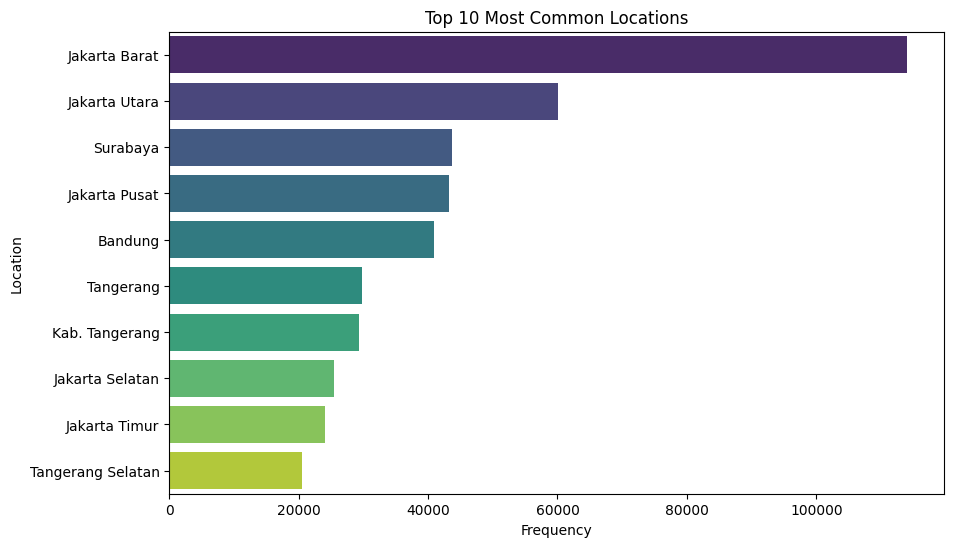

In [105]:
# Top 10 most common locations based on their frequency
top_location = df['location'][df['location'] != 'Unknown'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_location.values, y=top_location.index, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.title('Top 10 Most Common Locations')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_6752\1576868031.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_location.values, y=avg_price_location.index, palette='coolwarm')


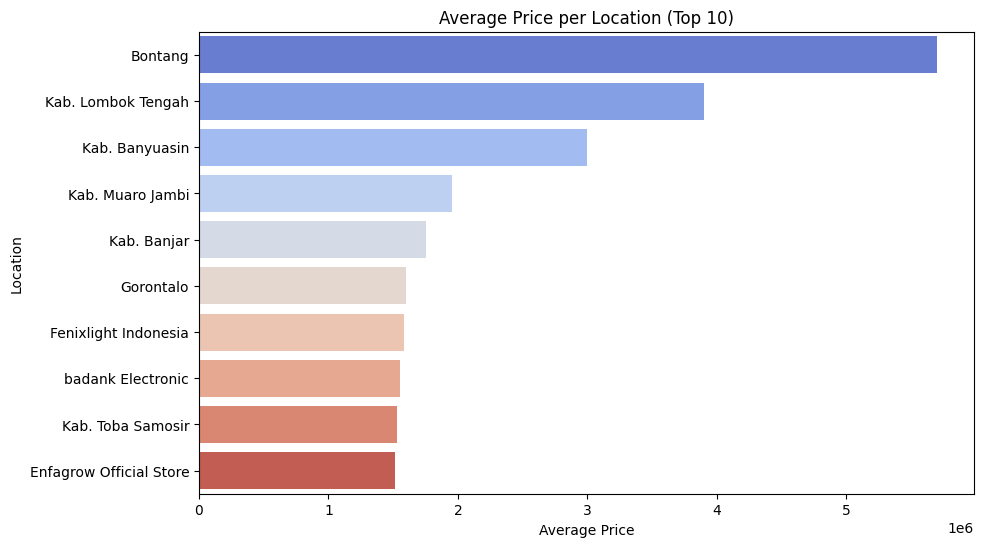

In [106]:
avg_price_location = df.groupby('location')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_location.values, y=avg_price_location.index, palette='coolwarm')
plt.title('Average Price per Location (Top 10)')
plt.xlabel('Average Price')
plt.ylabel('Location')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_6752\518624240.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sold_locations.values, y=top_sold_locations.index, palette="Blues_r")


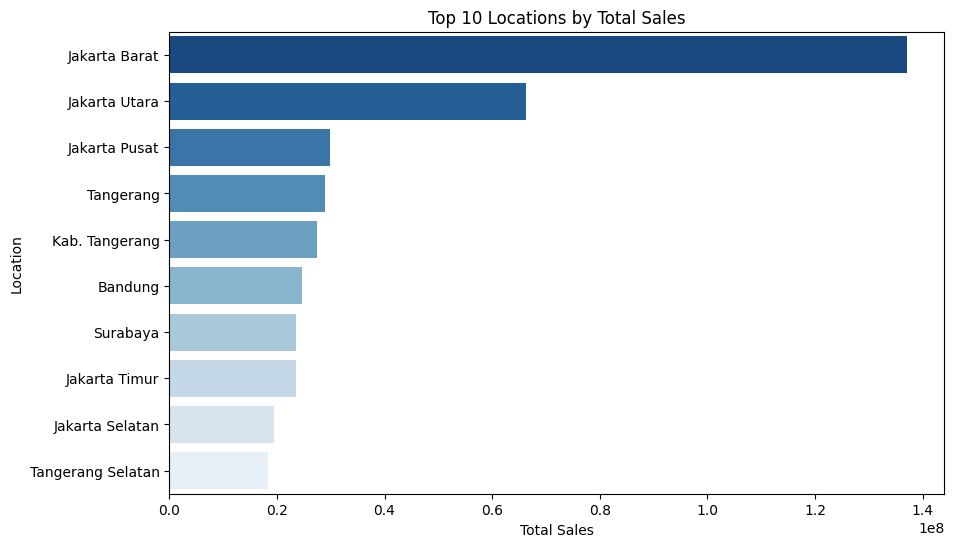

In [107]:
top_sold_locations = df.groupby('location')['sold'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_sold_locations.values, y=top_sold_locations.index, palette="Blues_r")
plt.title('Top 10 Locations by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Location')
plt.show()


## Text Clustering

In [108]:
# copy 'name' column to new dataframe for clustering
df_clustering = df.copy()
df_clustering.head()

name     price location  \
0  JUBAH HITAM MADANI JUBAH MADANI GAMIS PRIA JUB...  167500.0  Unknown   
1  Terbatas Sewa Global Travel Wifi Middle East A...  207110.0  Unknown   
2  paper bowl 650 ml rice bowl 22 oz star pack ma...     725.0  Bandung   
3  Profesional Hitam Bambu Dizi Seruling Buatan T...  191000.0  Unknown   
4  HEPA FILTER Air Purifier Levoit Core 400s / Co...  379000.0  Unknown   

   rating     sold  
0     0.0      0.0  
1     0.0      0.0  
2     5.0  10000.0  
3     0.0      0.0  
4     0.0      0.0

In [109]:
# check duplicates in 'name' column
df_clustering[df_clustering.duplicated(subset='name')]

name      price  \
2177    PT01-D Pita tali balon ribbon bunga 5 mm 1 met...      300.0   
3217    Memory Stick Pro HG Duo Card SONY Kamera PSP 16GB   248000.0   
3350    Squalene - Obat Kolesterol, Sakit Jantung, Str...   117000.0   
3575    Mainan Anak Ring Basket Free Bola Basket - Bas...    17300.0   
3879    Tas make up Mainan Kosmetik Anak salon Makeup ...    17500.0   
...                                                   ...        ...   
933973  NOVA MIXED BERRIES Rabbit Food / NOVA ALFALFA ...    33980.0   
933977  PAKET CCTV HIKVISION 5MP 4 CHANNEL 4 CAMERA TU...  2722700.0   
933978  Klakson Denso disc Waterproof 12 V Bisa Buat M...    10750.0   
933980  Vegetables Mix Capcay Frozen Sayuran Beku Capc...    28000.0   
933981  Natiolal Geographic Kids Look&Learn 12 book bo...   528000.0   

             location  rating   sold  
2177    Jakarta Timur     5.0   80.0  
3217          Unknown     0.0    0.0  
3350          Unknown     0.0    0.0  
3575    Jakarta Utara     4.9  100.0  
3879    Jakarta Barat     4.9  100.0  
...               ...     ...    ...  
933973  Jakarta Barat     5.0  250.0  
933977        Unknown     0.0    0.0  
933978  Jakarta Pusat     4.8  100.0  
933980  Jakarta Utara     5.0    9.0  
933981        Unknown     0.0    0.0  

[127881 rows x 5 columns]

In [110]:
# delete duplicates in 'name' column and keep the first row
df_clustering.drop_duplicates(subset='name', keep='first', inplace=True)

In [111]:
# check duplicates in 'name' column after deleting duplicates
df_clustering[df_clustering.duplicated(subset='name')]

Empty DataFrame
Columns: [name, price, location, rating, sold]
Index: []

In [112]:
# check null value in 'name' column
df_clustering['name'].isna().sum()

1

In [113]:
# delete null value in 'name' column
df_clustering.dropna(subset=['name'], inplace=True)

# check null value in 'name' column after deleting null value
df_clustering['name'].isna().sum()

0

In [114]:
df_clustering.head()

name     price location  \
0  JUBAH HITAM MADANI JUBAH MADANI GAMIS PRIA JUB...  167500.0  Unknown   
1  Terbatas Sewa Global Travel Wifi Middle East A...  207110.0  Unknown   
2  paper bowl 650 ml rice bowl 22 oz star pack ma...     725.0  Bandung   
3  Profesional Hitam Bambu Dizi Seruling Buatan T...  191000.0  Unknown   
4  HEPA FILTER Air Purifier Levoit Core 400s / Co...  379000.0  Unknown   

   rating     sold  
0     0.0      0.0  
1     0.0      0.0  
2     5.0  10000.0  
3     0.0      0.0  
4     0.0      0.0

In [115]:
df_clustering.reset_index(drop=True, inplace=True)

In [116]:
# get 1% sample of 'name' column for clustering
df_clustering = df_clustering.sample(frac=0.01, random_state=42)
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8061 entries, 182081 to 421928
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      8061 non-null   object 
 1   price     8061 non-null   float64
 2   location  8061 non-null   object 
 3   rating    8061 non-null   float64
 4   sold      8061 non-null   float64
dtypes: float64(3), object(2)
memory usage: 377.9+ KB


In [117]:
# check the length of 'name' column
df_clustering['name_length'] = df_clustering['name'].apply(len)
df_clustering['name_length'].describe()

count    8061.000000
mean       61.348964
std        21.620530
min         8.000000
25%        50.000000
50%        64.000000
75%        69.000000
max       255.000000
Name: name_length, dtype: float64

In [118]:
df_clustering = df_clustering[['name', 'name_length']]
df_clustering.reset_index(drop=True, inplace=True)
df_clustering.head()

name  name_length
0   Gamis Pria Dewasa Premium / Jubah Pakistan Polos           48
1  Buket Bunga Mawar Flanel / Bunga wisuda / Bung...           56
2  Mika Sen Depan Supra Fit New Kaca Lampu Sein D...           66
3  Blazer wanita jumbo big size stik balik / plus...           57
4  Buku Ilmu Sosial Budaya Dasar Perspektif Baru ...           69

### Preprocessing Text for Clustering

#### Basic Preprocessing

In [119]:
# load indonesian stopword
factory = StopWordRemoverFactory()
indonesian_stopwords = set(factory.get_stop_words())

# load english stopword
english_stopwords = set(stopwords.words('english'))

# combine stopword
combined_stopwords = indonesian_stopwords.union(english_stopwords)

def basic_preprocess(text):
    # convert to string
    text = str(text)
    # convert to lowercase
    text = text.lower()
    # remove punctuation
    text = re.sub(f"[{string.punctuation}]", ' ', text)
    # remove digit/number
    text = re.sub(r'\d+', ' ', text)
    # remove 1 character word
    text = re.sub(r'[^a-z\s]', ' ', text)
    # filtering stopwords
    text = ' '.join(word for word in text.split() if word not in combined_stopwords)
    # remove extra space
    text = text.strip()
    text = re.sub('\s+', ' ', text)
    return text

# apply basic_preprocess function to 'name' column
df_clustering['clean_name'] = df_clustering['name'].apply(basic_preprocess)
df_clustering.head()

name  name_length  \
0   Gamis Pria Dewasa Premium / Jubah Pakistan Polos           48   
1  Buket Bunga Mawar Flanel / Bunga wisuda / Bung...           56   
2  Mika Sen Depan Supra Fit New Kaca Lampu Sein D...           66   
3  Blazer wanita jumbo big size stik balik / plus...           57   
4  Buku Ilmu Sosial Budaya Dasar Perspektif Baru ...           69   

                                          clean_name  
0     gamis pria dewasa premium jubah pakistan polos  
1  buket bunga mawar flanel bunga wisuda bunga so...  
2  mika sen depan supra fit new kaca lampu sein d...  
3  blazer wanita jumbo big size stik balik plus s...  
4  buku ilmu sosial budaya dasar perspektif baru ...

### Preprocessing Method Selection

After conducting experiments using **Stanza** and **Flair** for POS tagging, as well as testing different methods for converting text to numbers (**TF-IDF** and **SentenceTransformer**), I have determined the best preprocessing approach for clustering.  

Based on the results (detailed in the `just_analysis.ipynb` file), I chose to use **Stanza** for POS tagging and **TF-IDF** for text-to-number conversion as the "best" method for preprocessing text data before clustering.


#### Preprocessing Text by Extracting Noun Using POS Tagger

In [120]:
def extract_noun_stanza(text, nlp):
    try:
        tokens = re.split(r'[^\w]+', text.lower())
        cleaned_text = ' '.join(filter(None, tokens))
        
        doc = nlp(cleaned_text)
        nouns = [word.text for sentence in doc.sentences for word in sentence.words if word.upos in {'NOUN'}]
        if(nouns):
            return ' '.join(nouns)
        
        nouns = [word.text for sentence in doc.sentences for word in sentence.words if word.upos in {'NOUN', 'PROPN'}]
        if(nouns):
            return ' '.join(nouns)
          
        nouns = [word.text for sentence in doc.sentences for word in sentence.words if word.upos not in {'NUM', 'PUNCT'}]
        if(nouns):
            return ' '.join(nouns)
        
        return cleaned_text
    except Exception as e:
        print(f"Error processing text: {text}. Exception: {e}")
        return ''

In [121]:
df_clustering['noun_en'] = df_clustering['name'].apply(lambda text: extract_noun_stanza(text, nlp_en))

In [122]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8061 entries, 0 to 8060
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         8061 non-null   object
 1   name_length  8061 non-null   int64 
 2   clean_name   8061 non-null   object
 3   noun_en      8061 non-null   object
dtypes: int64(1), object(3)
memory usage: 252.0+ KB


In [123]:
# list all word that has frequency below 10/20/30/40 but only remove word that is not 'NOUN' or 'PROPN' 
def remove_word_bottom_noun(df, num_delete, column_name):
    try:
        all_words = ' '.join(df[column_name]).split()
        word_counts = Counter(all_words)
        words_below = [word for word, count in word_counts.items() if count < num_delete]
        remove_words = [
            word.text
            for word in words_below
            for sentence in nlp(word).sentences
            for word in sentence.words
            if word.upos not in {'NOUN', 'PROPN'}
        ]
        
        return remove_words
    except Exception as e:
        print(f"Error processing column: {column_name}. Exception: {e}")
        return ''

In [124]:
# remove words based on list of removed words from above function
def remove_specific_words(text, remove_word):
    try:
        if not text:
            return ''
        words = text.split()
        filtered_words = [word for word in words if word.lower() not in remove_word]
        return ' '.join(filtered_words)
    except Exception as e:
        print(f"Error processing text: {text}. Exception: {e}")
        return ''

In [125]:
# check if there is any empty data after removal
def check_empty_column(df, column_name):
    try:
        df['name_length'] = df[column_name].apply(lambda x: len(x.split()))
        return df[df['name_length'] == 0][['name', 'clean_name', column_name, 'name_length']]
    except Exception as e:
        print(f"Error processing column: {column_name}. Exception: {e}")
        return ''

In [126]:
# check if there is any empty data
df_clustering['name_length'] = df_clustering['noun_en'].apply(lambda x: len(x))

df_clustering[df_clustering['name_length'] == 0][['name', 'noun_en', 'name_length']]

Empty DataFrame
Columns: [name, noun_en, name_length]
Index: []

In [127]:
frequency_list = [10, 20, 30, 40] # list of frequency to remove

for freq in frequency_list:
    print(f"Remove Word that has frequency less than {freq}")
    # remove word that has frequency less than 10/20/30/40
    remove_word_list = remove_word_bottom_noun(df_clustering, freq, 'noun_en')
    print("Total Removed Word : ", len(remove_word_list))

    # apply remove_specific_words function to 'noun_en' column
    df_clustering['noun_en_rm'+str(freq)] = df_clustering['noun_en'].apply(lambda x: remove_specific_words(x, remove_word_list))

    # check empty column after removing word that has frequency less than 10/20/30/40
    empty_column = check_empty_column(df_clustering, 'noun_en_rm'+str(freq))
    print("Total Empty Column : ", len(empty_column))

    # fill empty column with clean_name
    if(len(empty_column) > 0):
        df_clustering.loc[df_clustering['name_length'] == 0, 'noun_en_rm'+str(freq)] = df_clustering['clean_name']

    # check empty column after filling with clean_name
    empty_column = check_empty_column(df_clustering, 'noun_en_rm'+str(freq))
    print("Total Empty Column (after filling With clean_name) : ", len(empty_column))
    print("=====================================================================================================")

Remove Word that has frequency less than 10
Total Removed Word :  621
Total Empty Column :  10
Total Empty Column (after filling With clean_name) :  0
Remove Word that has frequency less than 20
Total Removed Word :  664
Total Empty Column :  18
Total Empty Column (after filling With clean_name) :  0
Remove Word that has frequency less than 30
Total Removed Word :  672
Total Empty Column :  19
Total Empty Column (after filling With clean_name) :  0
Remove Word that has frequency less than 40
Total Removed Word :  680
Total Empty Column :  21
Total Empty Column (after filling With clean_name) :  0


In [128]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8061 entries, 0 to 8060
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          8061 non-null   object
 1   name_length   8061 non-null   int64 
 2   clean_name    8061 non-null   object
 3   noun_en       8061 non-null   object
 4   noun_en_rm10  8061 non-null   object
 5   noun_en_rm20  8061 non-null   object
 6   noun_en_rm30  8061 non-null   object
 7   noun_en_rm40  8061 non-null   object
dtypes: int64(1), object(7)
memory usage: 503.9+ KB


### Clustering Experiment

In [129]:
# list of range to be used in clustering
range_list = [range(2, 20), range(100, 120), range(500, 520), range(1000, 1020)]

# list of vectorizers
vectorizers = {
    'basic preprocessing': TfidfVectorizer(max_df=0.95, stop_words='english').fit_transform(df_clustering['clean_name']),
    'original en_noun': TfidfVectorizer(max_df=0.95, stop_words='english').fit_transform(df_clustering['noun_en']),
    'en_noun remove-10': TfidfVectorizer(max_df=0.95, stop_words='english').fit_transform(df_clustering['noun_en_rm10']),
    'en_noun remove-20': TfidfVectorizer(max_df=0.95, stop_words='english').fit_transform(df_clustering['noun_en_rm20']),
    'en_noun remove-30': TfidfVectorizer(max_df=0.95, stop_words='english').fit_transform(df_clustering['noun_en_rm30']),
    'en_noun remove-40': TfidfVectorizer(max_df=0.95, stop_words='english').fit_transform(df_clustering['noun_en_rm40']),
}

# list for storing clustering result
results = []  

In [130]:
# function for clustering experiment
def clustering_experiment(range_list, results):
    for name, data in vectorizers.items():
        print(f"Evaluating data={name}...")
        for cluster_range in range_list:
            silhouette_scores = []
            for n_clusters in cluster_range:
                # K-Means clustering
                kmeans = KMeans(n_clusters=n_clusters, random_state=42)
                labels = kmeans.fit_predict(data)
                score = silhouette_score(data, labels)
                silhouette_scores.append(score)
            
            # Calculate average and best silhouette score
            avg_score = sum(silhouette_scores) / len(silhouette_scores)
            best_score = max(silhouette_scores)

            # Store the result
            results.append({
                'model_noun': name,
                'cluster_range': f"{cluster_range.start}-{cluster_range.stop - 1}",
                'avg_silhouette_score': avg_score,
                'best_silhouette_score': best_score
            })

# run clustering experiment
clustering_experiment(range_list, results)

Evaluating data=basic preprocessing...
Evaluating data=original en_noun...
Evaluating data=en_noun remove-10...
Evaluating data=en_noun remove-20...
Evaluating data=en_noun remove-30...
Evaluating data=en_noun remove-40...


### Analysis Experiment Results

In [131]:
# convert results to dataframe for better visualization
results_df = pd.DataFrame(results)

In [132]:
results_df.head(50)

model_noun cluster_range  avg_silhouette_score  \
0   basic preprocessing          2-19              0.005757   
1   basic preprocessing       100-119              0.020104   
2   basic preprocessing       500-519              0.034923   
3   basic preprocessing     1000-1019              0.048544   
4      original en_noun          2-19              0.007424   
5      original en_noun       100-119              0.011135   
6      original en_noun       500-519              0.036467   
7      original en_noun     1000-1019              0.044820   
8     en_noun remove-10          2-19              0.007033   
9     en_noun remove-10       100-119              0.007101   
10    en_noun remove-10       500-519              0.038982   
11    en_noun remove-10     1000-1019              0.053632   
12    en_noun remove-20          2-19              0.008198   
13    en_noun remove-20       100-119              0.010584   
14    en_noun remove-20       500-519              0.028705   
15    en_noun remove-20     1000-1019              0.047856   
16    en_noun remove-30          2-19              0.008222   
17    en_noun remove-30       100-119              0.007763   
18    en_noun remove-30       500-519              0.034596   
19    en_noun remove-30     1000-1019              0.049481   
20    en_noun remove-40          2-19              0.008156   
21    en_noun remove-40       100-119              0.013681   
22    en_noun remove-40       500-519              0.036597   
23    en_noun remove-40     1000-1019              0.049357   

    best_silhouette_score  
0                0.007826  
1                0.021472  
2                0.035594  
3                0.048680  
4                0.012365  
5                0.012467  
6                0.036946  
7                0.044974  
8                0.012243  
9                0.008568  
10               0.039554  
11               0.053929  
12               0.013697  
13               0.013095  
14               0.029354  
15               0.048287  
16               0.013764  
17               0.008866  
18               0.035871  
19               0.049896  
20               0.014480  
21               0.015574  
22               0.036923  
23               0.049899

### Box plot to visualize the distribution of silhouette scores by preprocessing method

C:\Users\User\AppData\Local\Temp\ipykernel_6752\2327254832.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


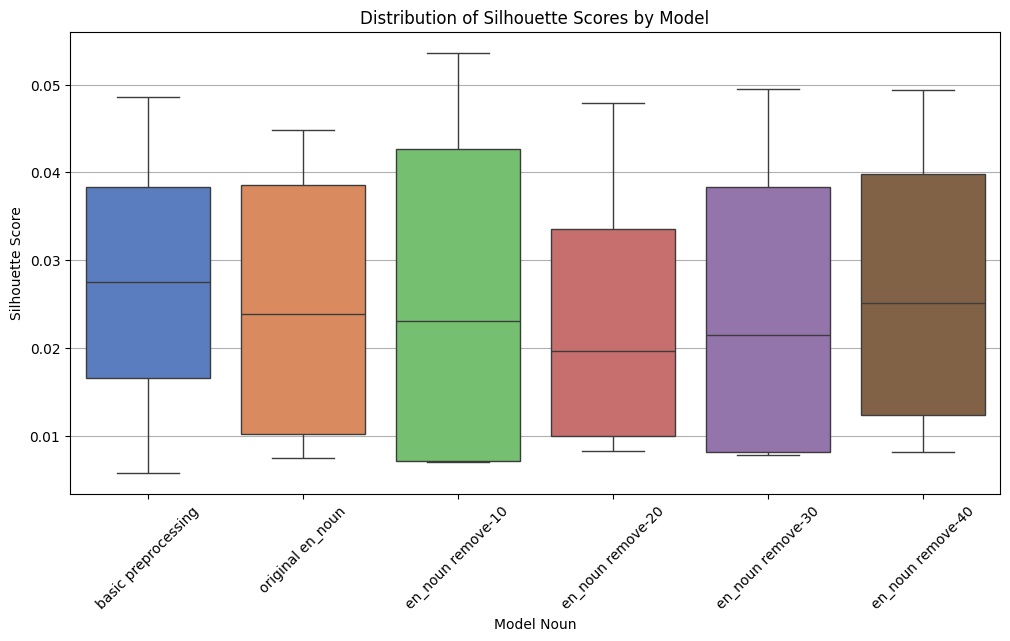

In [ ]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=results_df,
    x='model_noun',
    y='avg_silhouette_score',
    palette='muted',
    hue='model_noun'
)
plt.title("Distribution of Silhouette Scores by Preprocessing Method")
plt.xlabel("Preprocessing Method")
plt.ylabel("Silhouette Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Line plot to visualize the trend of silhouette scores over cluster range

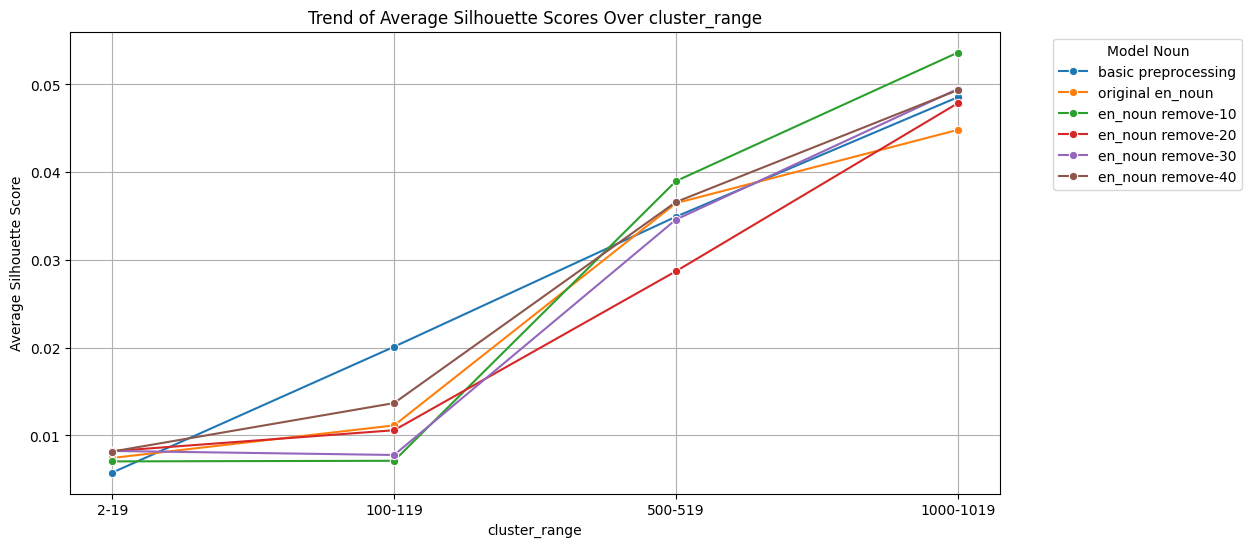

In [134]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=results_df,
    x='cluster_range',
    y='avg_silhouette_score',
    hue='model_noun',
    marker='o',
    palette='tab10'
)
plt.title("Trend of Average Silhouette Scores Over cluster_range")
plt.xlabel("cluster_range")
plt.ylabel("Average Silhouette Score")
plt.legend(title="Model Noun", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

### Facet grid plot to visualize the distribution of best silhoutte scores over cluster range for each preprocessing method

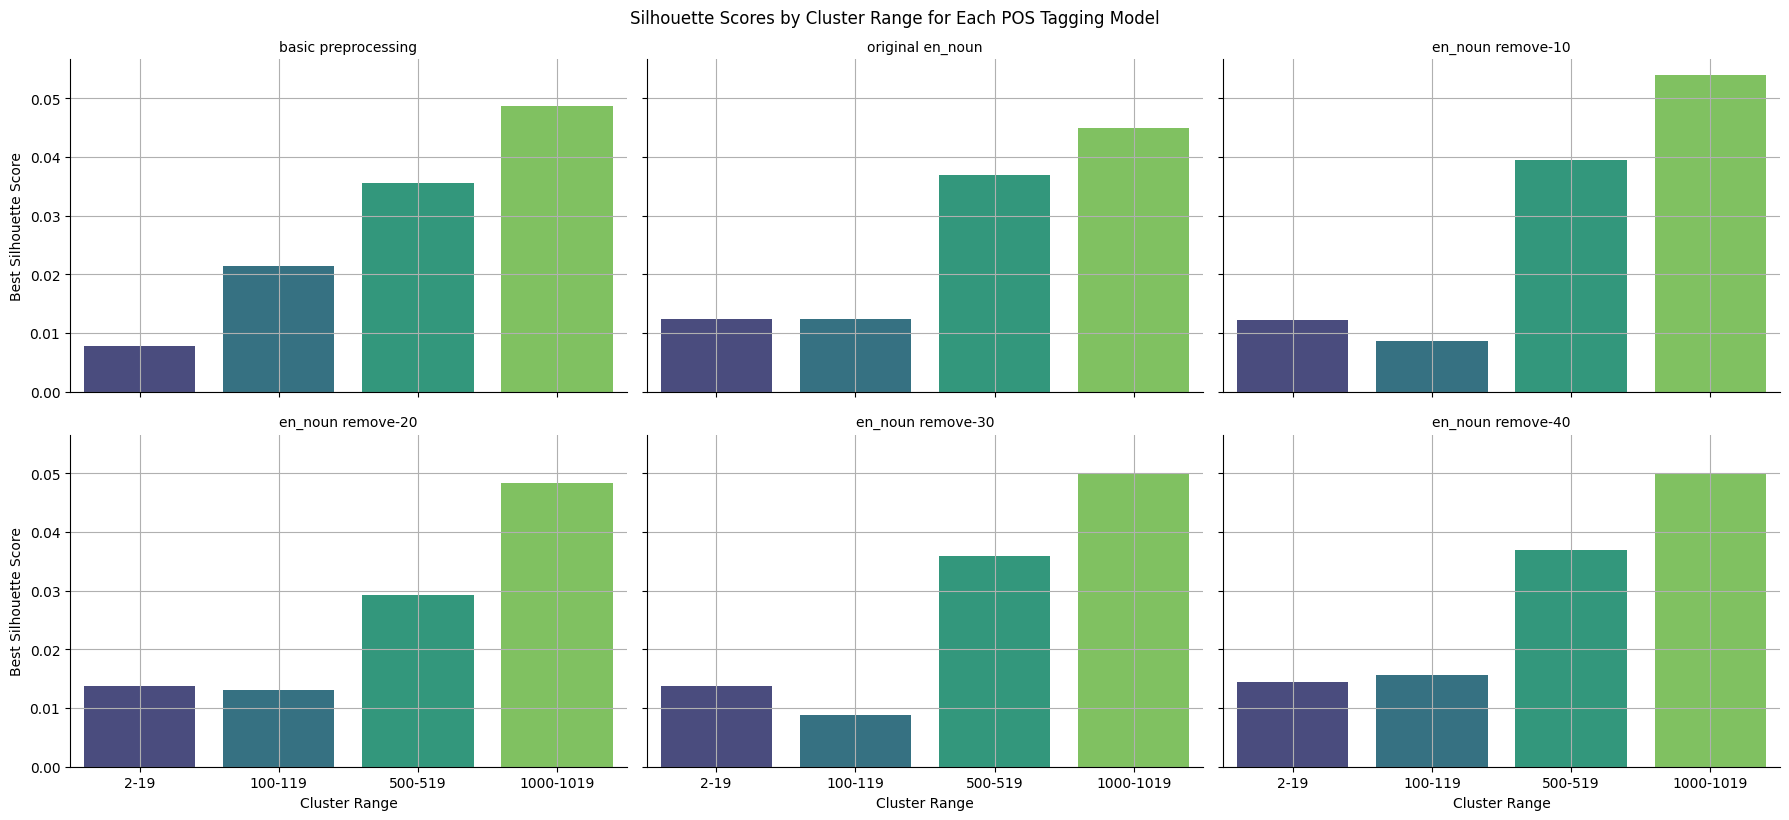

In [135]:
g = sns.FacetGrid(
    results_df,
    col="model_noun",
    col_wrap=3,
    height=4,
    aspect=1.5
)
g.map_dataframe(sns.barplot, x="cluster_range", y="best_silhouette_score", palette="viridis", hue="cluster_range")
g.set_titles("{col_name}")
g.set_axis_labels("Cluster Range", "Best Silhouette Score")
g.figure.suptitle("Silhouette Scores by Cluster Range for Each POS Tagging Model", y=1.02)
for ax in g.axes.flatten():
    ax.grid(True)

plt.show()

### Facet grid plot to visualize the distribution of average silhoutte scores over cluster range for each preprocessing method

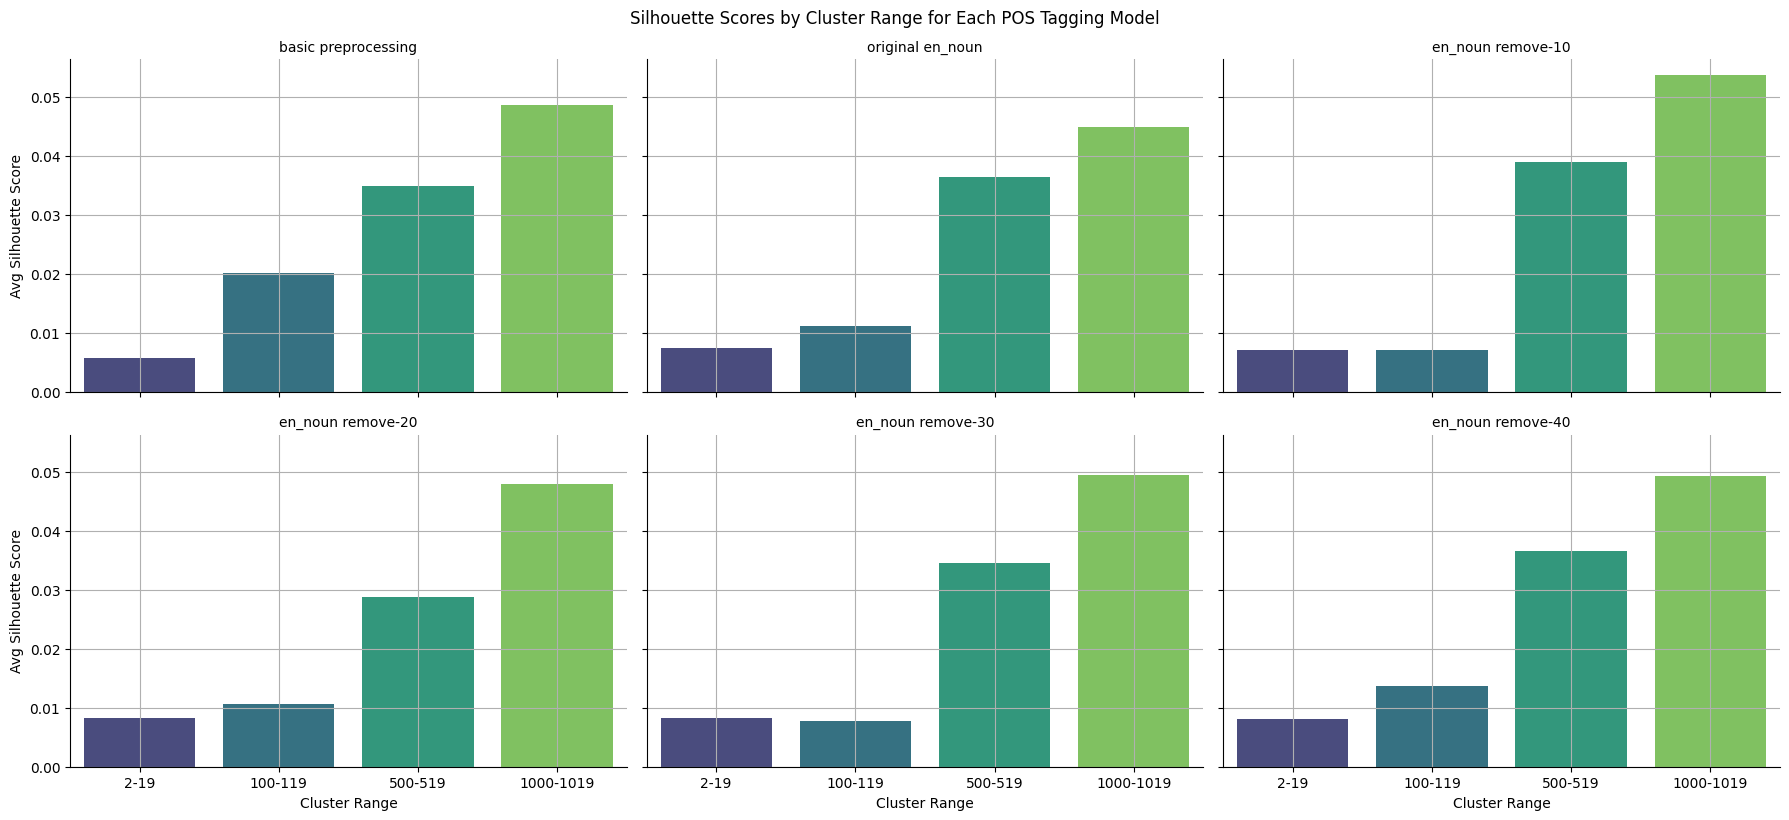

In [136]:
g = sns.FacetGrid(
    results_df,
    col="model_noun",
    col_wrap=3,
    height=4,
    aspect=1.5
)
g.map_dataframe(sns.barplot, x="cluster_range", y="avg_silhouette_score", palette="viridis", hue="cluster_range")
g.set_titles("{col_name}")
g.set_axis_labels("Cluster Range", "Avg Silhouette Score")
g.figure.suptitle("Silhouette Scores by Cluster Range for Each POS Tagging Model", y=1.02)
for ax in g.axes.flatten():
    ax.grid(True)

plt.show()

# Choose the Best Preprocessing Method and Continue Analysis by Clustering

I selected what I believe to be the best preprocessing method from all the methods I experimented with (a full explanation of my experiments can be found in the `just_analysis.ipynb` file). The output from this preprocessing method is stored in the column named **'en_noun remove_40'**.

Although the silhouette score for this method is quite low (around **0.05**), the quality of the resulting clusters is significantly better compared to other preprocessing methods, even those with higher silhouette scores (e.g., ~0.7). This conclusion is based on evaluating the **first 10 clusters**, as it’s impractical to manually review all 1,000 clusters generated (haha).

The reason I opted for a large number of clusters is related to the dataset itself. Referring to the `produk_name` and `category` datasets available on Kaggle, there are over **700 distinct categories**. Thus, a higher number of clusters is justified to ensure that the granularity of the clustering aligns with the dataset's diversity.

In [149]:
def show_cluster(column_name, cluster_number, cluster_end: int = None):
    if cluster_end is None:
        cluster_end = cluster_number
        cluster_number = 0
    pd.set_option('display.max_colwidth', None)

    # Show some product examples from each cluster
    for n_clusters in range(cluster_number, cluster_end):
        print(f"\nExamples of products in Cluster {n_clusters}:")
        print(df_clustering[df_clustering[column_name] == n_clusters][['name']].head(5))

    # Reset display option
    pd.reset_option('display.max_colwidth')

In [150]:
from wordcloud import WordCloud

def show_wordclouds(column_name, cluster_number, cluster_end: int = None):
    if cluster_end is None:
        cluster_end = cluster_number
        cluster_number = 0
    for n_clusters in range(cluster_number, cluster_end):
        # get the data in the cluster
        cluster_data = df_clustering[df_clustering[column_name] == n_clusters]['name'].dropna().tolist()
        text = " ".join(cluster_data)  # join all the text in the cluster

        # Generate WordCloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        # Show WordCloud
        plt.figure(figsize=(6, 3))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"WordCloud for Cluster {n_clusters}", fontsize=16)
        plt.show()

## Find Optimum K Cluster using Elbow Method

#### For range 100-119

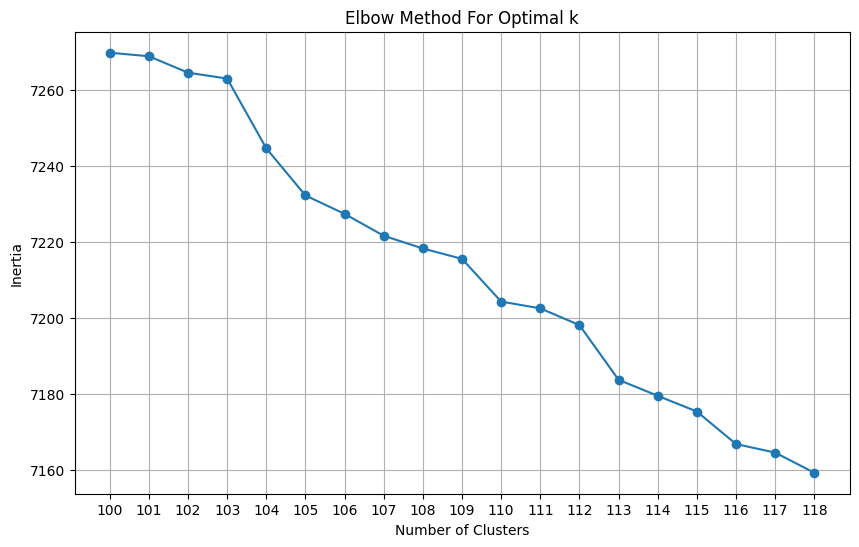

In [151]:
inertia_values = []
cluster_range = range(100, 119)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(vectorizers['en_noun remove-40'])
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(cluster_range)
plt.grid()
plt.show()

#### For range 500-519

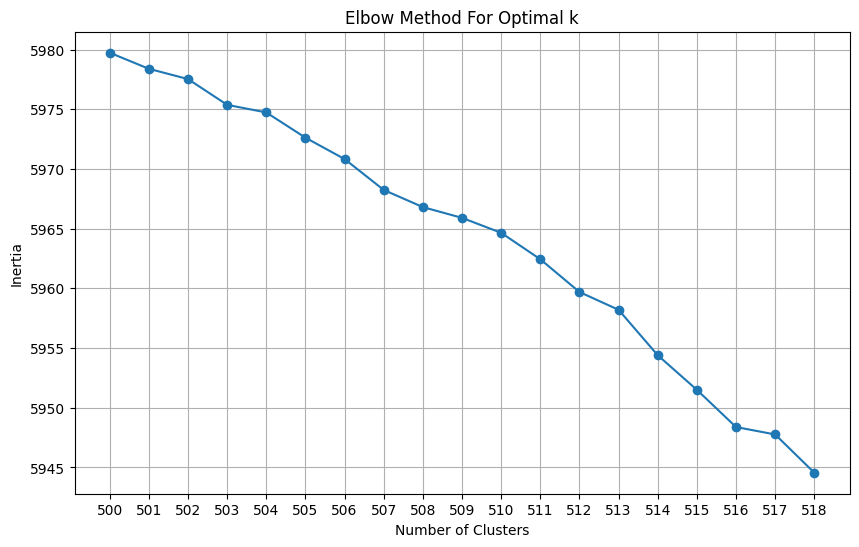

In [152]:
inertia_values = []
cluster_range = range(500, 519)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(vectorizers['en_noun remove-40'])
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(cluster_range)
plt.grid()
plt.show()

#### For range 1000-1019

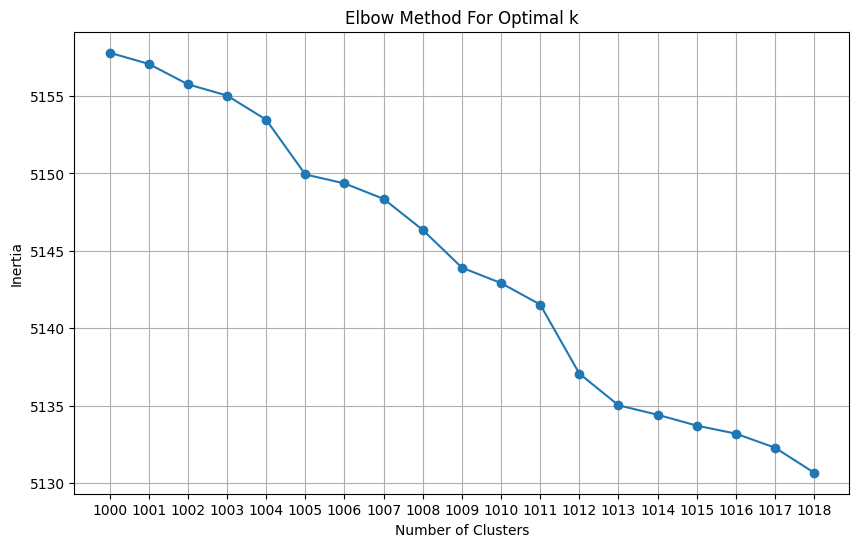

In [153]:
inertia_values = []
cluster_range = range(1000, 1019)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(vectorizers['en_noun remove-40'])
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(cluster_range)
plt.grid()
plt.show()

## Analysis Each Optimum Cluster

### Cluster 100


Examples of products in Cluster 0:
                                                                      name
866     Cangkul|Pacul Sawah/Kebun Cap Ayam Jago Ukuran Besar P.23/L.16,5cm
2008                 HIGHTY Rover Corduroy Polo Cap | Topi Snapback Unisex
2420          Cap Golf Pxg Structured High Crown | Golf | Topi Golf - Grey
2436           CHECK VALVE RECEIVER  R150CV BRAND FAST FILL ORIGINAL + CAP
2760  Shower Cap Plastik Topi Mandi Showercap Hotel Keramas Penutup Kepala

Examples of products in Cluster 1:
                                                                    name
170  Mini Dress Wanita / Pakaian Tidur Wanita / Sexy Look / Mixing Sutra
390   REGGY DRESS - PREMIUM DRESS OVERSIZED MOTIF ABSTRAK BIG SIZE/JUMBO
541     HM Baju Dress Kostum SPIDER GIRL kostum superhero anak perempuan
801          Joyce Maxi Dress Black - Dress Crinkle Airflow Nyaman Hitam
877             NFL dress cheerleader/dress anak perempuan branded murah

Examples of products in Cluster 2:
    

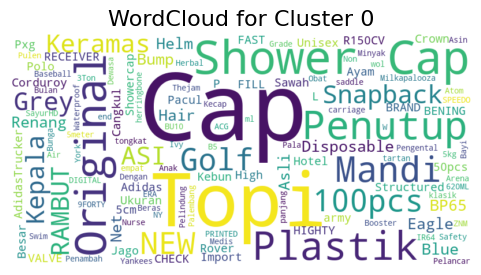

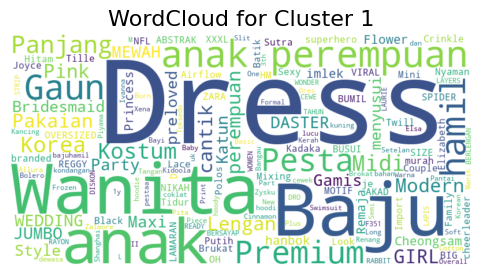

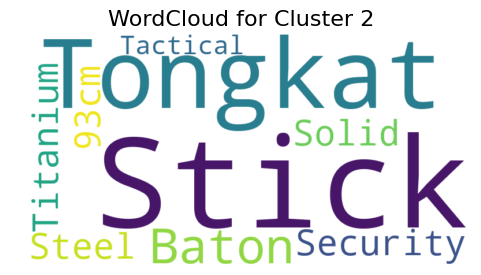

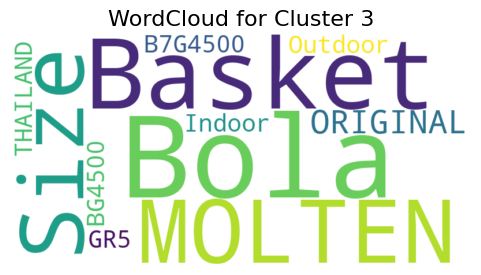

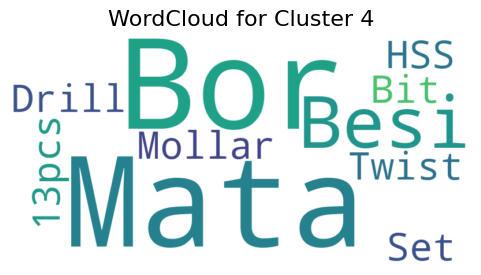

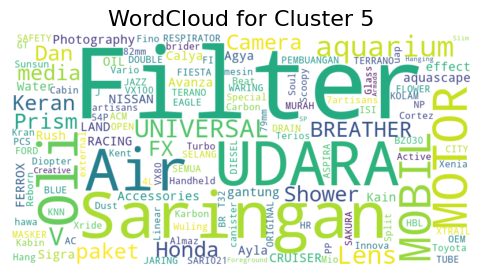

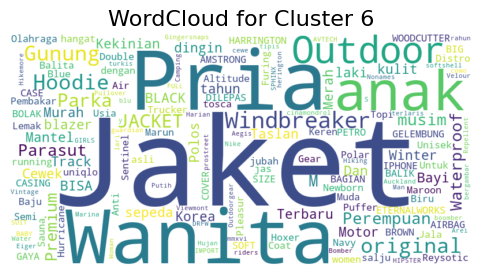

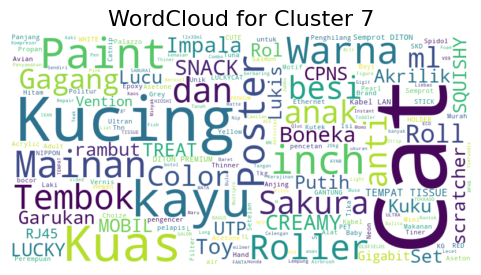

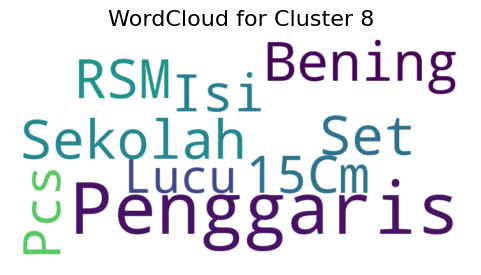

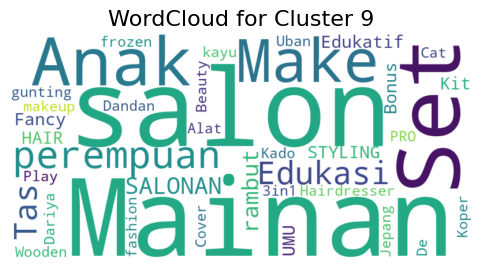

In [162]:
optimal_k = 105
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_clustering['cluster100'] = kmeans.fit_predict(vectorizers['en_noun remove-40'])
show_cluster('cluster100', 10)
show_wordclouds('cluster100', 10)

### Cluster 500


Examples of products in Cluster 0:
                                                                      name
866     Cangkul|Pacul Sawah/Kebun Cap Ayam Jago Ukuran Besar P.23/L.16,5cm
2008                 HIGHTY Rover Corduroy Polo Cap | Topi Snapback Unisex
2420          Cap Golf Pxg Structured High Crown | Golf | Topi Golf - Grey
2436           CHECK VALVE RECEIVER  R150CV BRAND FAST FILL ORIGINAL + CAP
2823  Topi Original Import AdidasTrucker - Adidas army Cap - Topi Snapback

Examples of products in Cluster 1:
                                                                          name
541           HM Baju Dress Kostum SPIDER GIRL kostum superhero anak perempuan
3390  Sorex Celana Dalam Anak Perempuan Kids Girl - NA 470 - Segitiga Soft - L
4827     Baju Bayi Perempuan Katun Pakaian Gaun Pesta New Born Baby Girl Dress

Examples of products in Cluster 2:
                                                                                                                            na

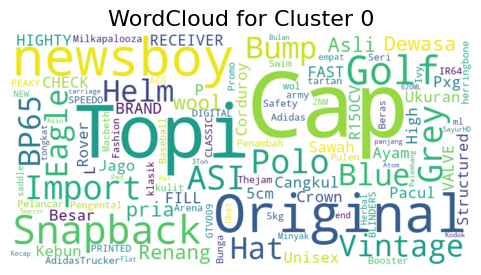

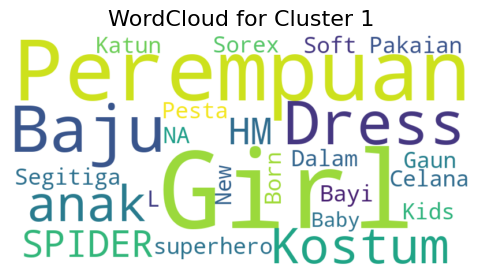

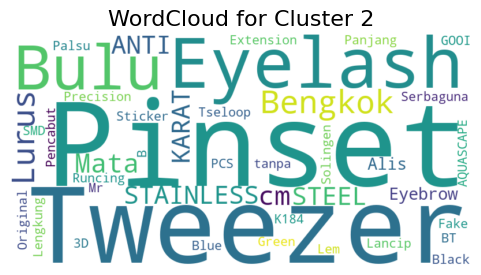

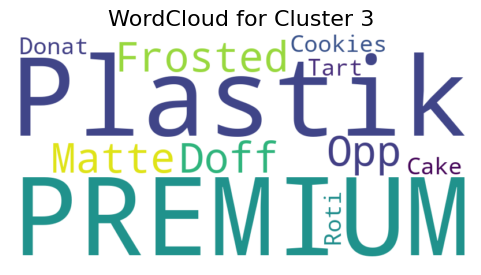

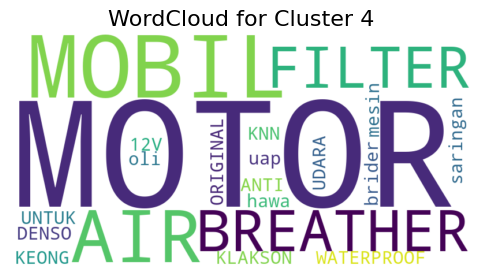

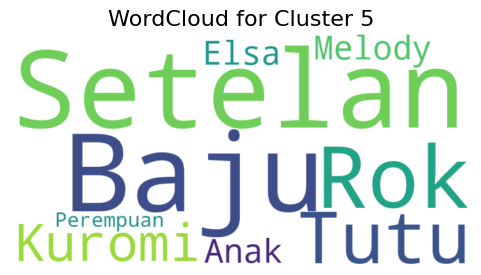

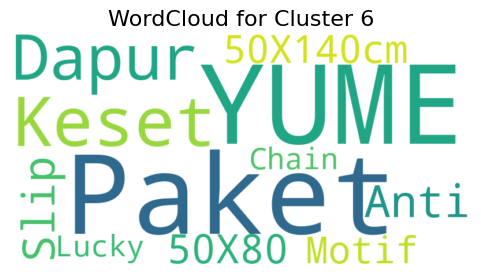

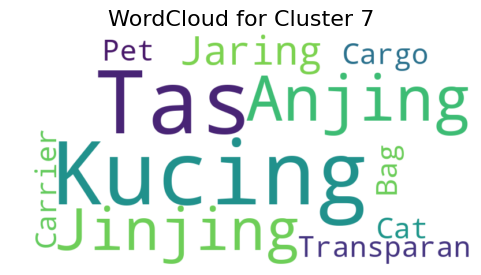

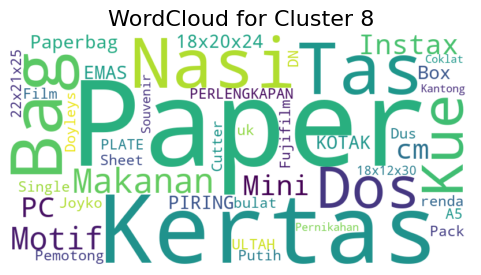

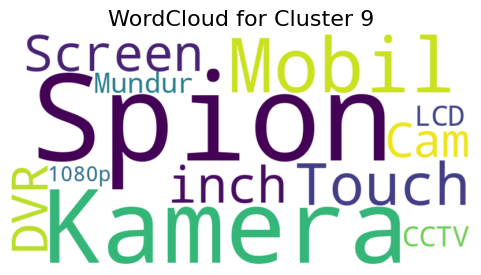

In [163]:
optimal_k = 516 # 516
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_clustering['cluster500'] = kmeans.fit_predict(vectorizers['en_noun remove-40'])
show_cluster('cluster500', 30)
show_wordclouds('cluster500', 10)

### Cluster 1000


Examples of products in Cluster 0:
                                                                      name
866     Cangkul|Pacul Sawah/Kebun Cap Ayam Jago Ukuran Besar P.23/L.16,5cm
2008                 HIGHTY Rover Corduroy Polo Cap | Topi Snapback Unisex
2420          Cap Golf Pxg Structured High Crown | Golf | Topi Golf - Grey
2436           CHECK VALVE RECEIVER  R150CV BRAND FAST FILL ORIGINAL + CAP
2760  Shower Cap Plastik Topi Mandi Showercap Hotel Keramas Penutup Kepala

Examples of products in Cluster 1:
                                                                    name
170  Mini Dress Wanita / Pakaian Tidur Wanita / Sexy Look / Mixing Sutra
390   REGGY DRESS - PREMIUM DRESS OVERSIZED MOTIF ABSTRAK BIG SIZE/JUMBO
541     HM Baju Dress Kostum SPIDER GIRL kostum superhero anak perempuan
801          Joyce Maxi Dress Black - Dress Crinkle Airflow Nyaman Hitam
877             NFL dress cheerleader/dress anak perempuan branded murah

Examples of products in Cluster 2:
    

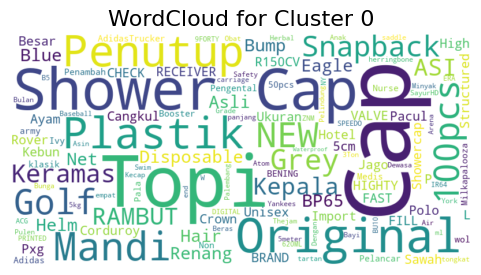

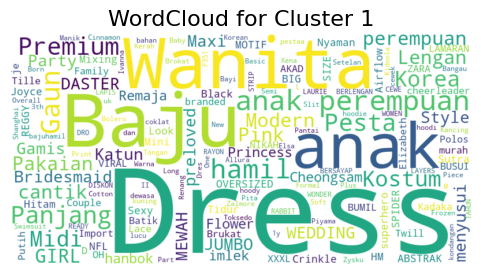

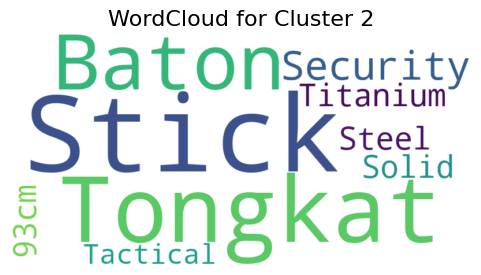

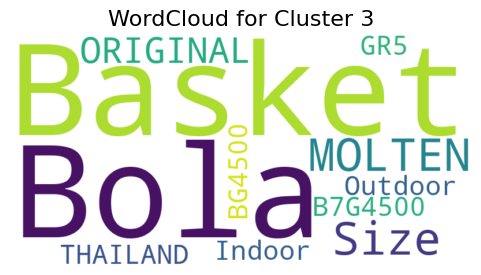

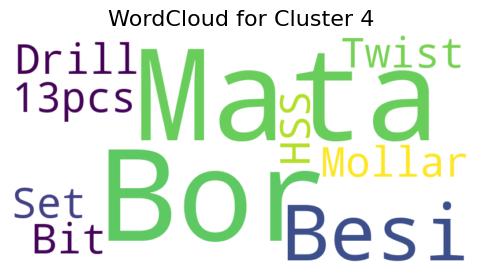

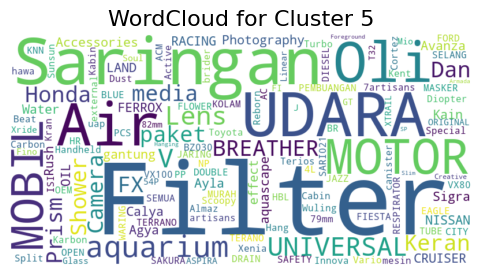

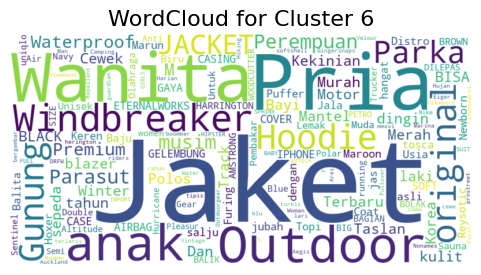

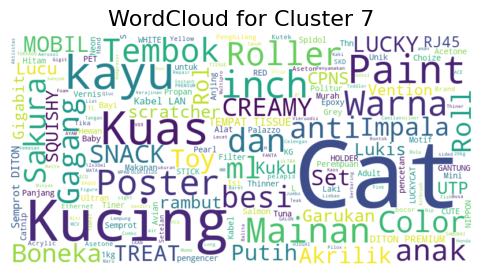

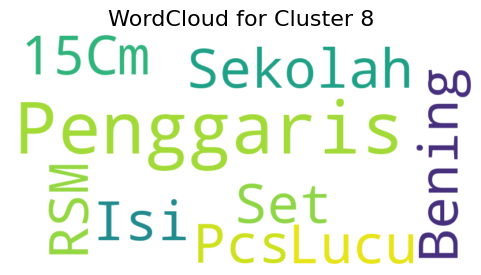

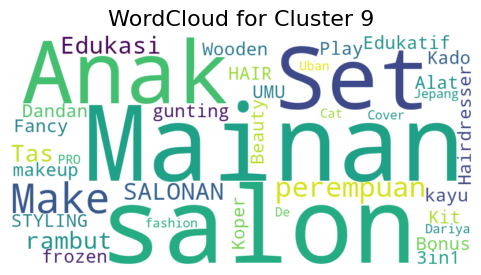

In [164]:
optimal_k = 103 # 1005
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_clustering['cluster1000'] = kmeans.fit_predict(vectorizers['en_noun remove-40'])
show_cluster('cluster1000', 10)
show_wordclouds('cluster1000', 10)

# Clustering Experiment Conclusion

Based on the clustering experiment using the **'en_noun remove-40'** preprocessing method with three cluster ranges, it is clear that the **k=516** cluster achieves the best results among the three ranges and across other experiment in other files (you can see **just_analysis.ipynb** files for more information about the experiment). However, this conclusion is primarily based on evaluating the first 10 clusters.

To gain deeper insights, I expanded the **'en_noun remove-40'** preprocessing method to 30 clusters. While some clusters did not contain the ideal categories, there were clusters that could still be meaningfully labeled. For example:  
- **Cluster 1**: Clothing  
- **Cluster 2**: Pinsets  
- **Cluster 3**: Air filters  
- **Cluster 13**: Watches  

Additionally, some clusters performed particularly well. For instance:  
- **Cluster 14** successfully grouped the word "pasta." However, this cluster included two distinct types of "pasta" – one related to food flavoring and the other to toothpaste.

These results highlight that while the clustering approach has some limitations, it demonstrates potential in identifying meaningful groupings and categories within the dataset.


# Recommendation System

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Nearest Neighbors Model
model_nn = NearestNeighbors(metric='cosine')
model_nn.fit(vectorizers['en_noun remove-40'])